Welcome to a competition powered by AutoDSC for Data Science Challenges! By Prof. Manoel Gadi!

PLEASE DO NOT RENAME THIS FILE!


Simply run this code and start competing today in the competion: 6aQ6IxU7Va

6aQ6IxU7Va details:
 - Description / Descripción: FRAUD MODELLING CHALLENGE - Predict which Credit Card Application is legitimate and which belongs to a fraudster instead.
 - Maximum number of daily attempts / Número máximo de intentos diarios: 100
 - Creation date / Fecha de creación: 2020-06-10 11:36:52
 - Starting date / Fecha de inicio: 2023-11-30 00:00:00
 - Ending date / Fecha de fin: 2023-12-14 23:59:00
 - Minimum time between prediction submissions / Tiempo mínimo entre envíos de predicciones: 60

Of couse, to win the competition you should improve the starting model! So let's get to work!


In [1]:
print ("IMPORTING LIBRARIES...")
import pandas as pd


print ("LOADING DATASETS...")
try: # reading train csv from local file
    df_train = pd.read_csv("mfalonso__6aQ6IxU7Va__train.csv")
    df_train.head()
except: # reading train csv from the internet if it is the first time
    import urllib
    csv_train = urllib.request.urlopen("http://manoelutad.pythonanywhere.com/static/uploads/mfalonso__6aQ6IxU7Va__train.csv")
    csv_train_content = csv_train.read()
    with open("mfalonso__6aQ6IxU7Va__train.csv", 'wb') as f:
            f.write(csv_train_content)
    df_train = pd.read_csv("mfalonso__6aQ6IxU7Va__train.csv")

    
try: # reading test csv from local file
    df_test = pd.read_csv("mfalonso__6aQ6IxU7Va__test.csv")
    df_test.head()
except: # reading test csv from the internet if it is the first time
    import urllib
    csv_test = urllib.request.urlopen("http://manoelutad.pythonanywhere.com/static/uploads/mfalonso__6aQ6IxU7Va__test.csv")
    csv_test_content = csv_test.read()
    with open("mfalonso__6aQ6IxU7Va__test.csv", 'wb') as f:
            f.write(csv_test_content)
    df_test = pd.read_csv("mfalonso__6aQ6IxU7Va__test.csv")

IMPORTING LIBRARIES...
LOADING DATASETS...


In [2]:
df_train.head()

,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,...,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,ob_target
0,0,1,0,1,0,0,1,1,0,0,...,0.800,0,6,5,0.500000,9.4634,5140.0,0.766667,1,0
1,1,2,0,1,0,0,0,1,0,0,...,0.925,5,8,5,0.400000,7.6341,2570.0,0.700000,4,0
2,2,3,0,0,0,0,1,1,0,0,...,0.800,3,10,6,0.700000,11.1707,5140.0,0.666667,2,0
3,3,4,0,1,0,1,1,1,0,0,...,0.825,5,5,6,0.433333,8.0488,1028.0,0.766667,3,0
4,4,5,0,0,0,0,0,1,0,0,...,0.800,0,11,5,0.700000,5.5854,5140.0,0.733333,3,0


In [3]:
print(df_test.shape)
df_test.head()

(2967, 84)


,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,...,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,contract_date
0,0,1,0,1,0,0,1,0,0,0,...,0.775,1.0,10.0,11.0,0.666667,NaN,5140.000000,0.666667,3,20-Sep-12
1,1,2,1,0,0,0,1,1,0,0,...,0.750,0.0,8.0,10.0,0.600000,12.9024,5140.000000,0.733333,0,24-Sep-12
2,2,3,0,0,0,0,1,1,0,0,...,0.725,0.0,8.0,6.0,0.700000,NaN,2570.000000,0.766667,1,19-Sep-12
3,3,4,0,1,0,1,1,1,0,0,...,0.925,2.0,7.0,5.0,0.566667,15.5366,2056.000000,0.833333,0,20-Sep-12
4,4,5,1,0,0,1,1,1,0,0,...,0.925,0.0,10.0,7.0,0.333333,17.8293,4728.799805,0.633333,2,25-Sep-12


In [4]:
df_train = df_train.drop(['id', 'Unnamed: 0'], axis=1)
df_test = df_test.drop(['id', 'Unnamed: 0', 'contract_date'], axis=1)

In [5]:
target_counts = df_train['ob_target'].value_counts(normalize=True) * 100  

target_percentages = target_counts.reset_index()
target_percentages.columns = ['Class', 'Percentage']

target_percentages

,Class,Percentage
0,0,89.814815
1,1,10.185185


#### Plots

In [6]:
# import matplotlib.pyplot as plt

# df_train.hist(bins=50, figsize=(30, 30))

# plt.show()

In [7]:
# df_test.hist(bins=50, figsize=(30, 30))

# plt.show()

#### Nulls

In [6]:
# nulls for df_train

# Calculating the number of missing values for each column
missing_values = df_train.isnull().sum()

# Displaying the missing values count for each column
missing_values = missing_values[missing_values > 0]

if len(missing_values) == 0:
    print("No Nulls on df_train")
else:
    print(missing_values[missing_values > 0].index)

No Nulls on df_train


In [7]:
# nulls for df_test

# Calculating the number of missing values for each column
missing_values = df_test.isnull().sum()
missing_values = missing_values[missing_values > 0]
# Displaying the missing values count for each column

if len(missing_values) == 0:
    print("No Nulls on df_test")
else:
    print(missing_values[missing_values > 0].index, "\n")
    print(missing_values[missing_values > 0])

Index(['ib_var_15', 'ib_var_16', 'ib_var_17', 'ib_var_18', 'ib_var_19',
       'ib_var_20', 'ib_var_21', 'icn_var_22', 'icn_var_24', 'ico_var_26',
       'ico_var_33', 'ico_var_37', 'if_var_78'],
      dtype='object') 

ib_var_15      1
ib_var_16      1
ib_var_17      1
ib_var_18      1
ib_var_19      1
ib_var_20      1
ib_var_21      1
icn_var_22    72
icn_var_24    20
ico_var_26     1
ico_var_33     1
ico_var_37     1
if_var_78     15
dtype: int64


In [9]:
ib_var_cols = [f"ib_var_{i}" for i in range(15, 22)]
df_test[ib_var_cols] = df_test[ib_var_cols].fillna((df_test[ib_var_cols].median()))
#df_test[ib_var_cols] = df_test[ib_var_cols].fillna(df_test[ib_var_cols].mode().iloc[0])

icn_var_cols = [f"icn_var_{i}" for i in range(22, 25)]
df_test[icn_var_cols] = df_test[icn_var_cols].fillna((df_test[icn_var_cols].median()))
#df_test[icn_var_cols] = df_test[icn_var_cols].fillna(df_test[icn_var_cols].mode().iloc[0])

ico_var_cols = [f"ico_var_{i}" for i in range(26, 38)]
df_test[ico_var_cols] = df_test[ico_var_cols].fillna((df_test[ico_var_cols].mean()))

if_var_cols = ['if_var_78']
df_test[if_var_cols] = df_test[if_var_cols].fillna(df_test[if_var_cols].mean())

In [10]:
# df_test = df_test.fillna(df_test.mode().iloc[0])

# columns_with_single_null = df_test.columns[df_test.isnull().sum() == 1]

# df_test = df_test.dropna(subset=columns_with_single_null)

# for column in df_test.columns[df_test.isnull().any()]:
#     median = df_test[column].median()
#     df_test[column] = df_test[column].fillna(median)

In [11]:
# print ("STEP 1: DOING MY TRANSFORMATIONS...")
# df_train = df_train.fillna(0)
# df_test = df_test.fillna(0)

# df_train = df_train.drop(['id'], axis=1)
# df_test = df_test.drop(['id', 'contract_date'], axis=1)

#### SMOTE

In [12]:
# pip install imbalanced-learn

In [7]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Asumiendo que 'ob_target' es tu variable objetivo
# X = df_train.drop('ob_target', axis=1)  # Características
# y = df_train['ob_target']  # Variable objetivo

# # Dividir los datos en conjuntos de entrenamiento y prueba
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# # Crear un objeto SMOTE
# smote = SMOTE(sampling_strategy=0.25, random_state=99)

# # Aplicar SMOTE solo al conjunto de entrenamiento
# X_train_smote, y_train_smote = smote.fit_resample(X,y)

# df_train = pd.concat([X_train_smote, y_train_smote], axis=1)

#### Scaling

In [6]:
# column_names = df_train.columns
# index = df_train.index

In [7]:
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# column_names = df_train.columns
# index = df_train.index

# scaler = StandardScaler()
# df_train_scaled = scaler.fit_transform(df_train)

# df_train = pd.DataFrame(df_train_scaled, columns=column_names, index=index)

#### Step 2 & 3

In [11]:
print ("STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...")
def get_specific_columns(df, data_types, to_ignore = list(), ignore_target = False):
    columns = df.select_dtypes(include=data_types).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return list(columns)

output_var = df_train.columns[-1]
in_model = get_specific_columns(df_train, ["float64", "int64"], [output_var], ignore_target = True)

STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...


In [12]:
print ("STEP 3: DEVELOPING THE MODEL...")
X_train = df_train[in_model]
y_train = df_train[output_var]
X_test = df_test[in_model]

STEP 3: DEVELOPING THE MODEL...


#### Model

In [13]:
# pip install deap

#### RF 

In [8]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Hiperparámetros para probar en la búsqueda en cuadrícula
# param_grid = {
#     'n_estimators': [10, 100, 250, 500, 750],
#     'max_depth': [ 40, 60, 80, 100, 150],
#     'min_samples_split': [5, 10, 20, 50, 100],
#     'min_samples_leaf': [1, 5, 10, 50, 100]
# }

# # Crear el modelo de RandomForest
# rfc = RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=99)

# # Configurar GridSearchCV con AUC como métrica de scoring
# grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')

# # Ajustar GridSearchCV
# grid_search.fit(X_train, y_train)

# # Mejores parámetros
# best_params = grid_search.best_params_
# print("Mejores parámetros:", best_params)

# # Mejor modelo
# best_model = grid_search.best_estimator_

# # Hacer predicciones con el mejor modelo
# pred_train = best_model.predict_proba(X_train)[:, 1]
# pred_test = best_model.predict_proba(X_test)[:, 1]


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# clf = LogisticRegression(random_state=0, solver='lbfgs')
rfc = RandomForestClassifier(class_weight={0: 1, 1: 5}, 
                             n_estimators= 700,
                             max_depth = None,
                             random_state=77)
fitted_model = rfc.fit(X_train, y_train)
pred_train = fitted_model.predict_proba(X_train)[:,1]
pred_test  = fitted_model.predict_proba(X_test)[:,1]

#### Feature Importance

In [55]:
importances = rfc.feature_importances_

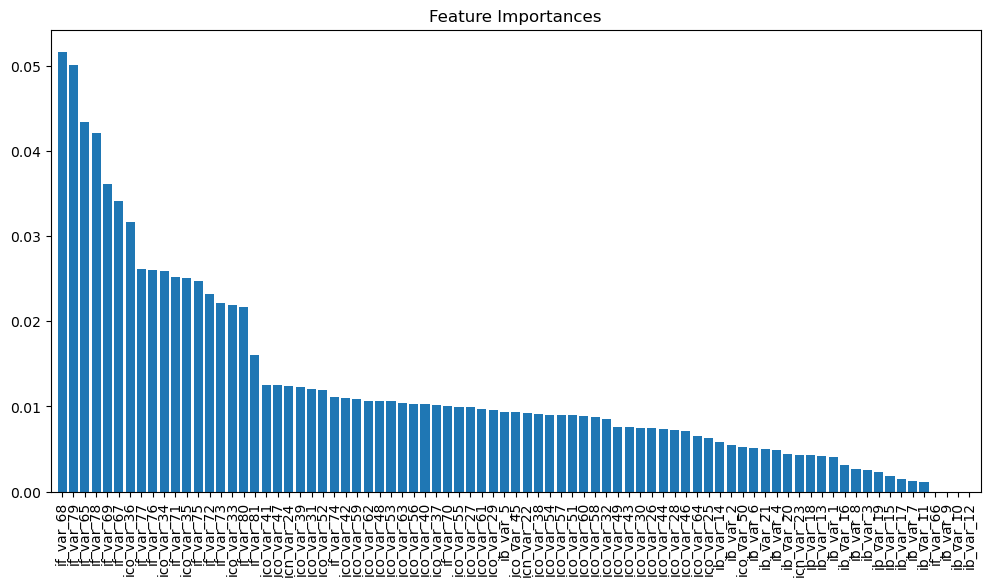

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de las variables
feature_names = X_train.columns

# Ordenar las importancias y sus índices
indices = np.argsort(importances)[::-1]

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

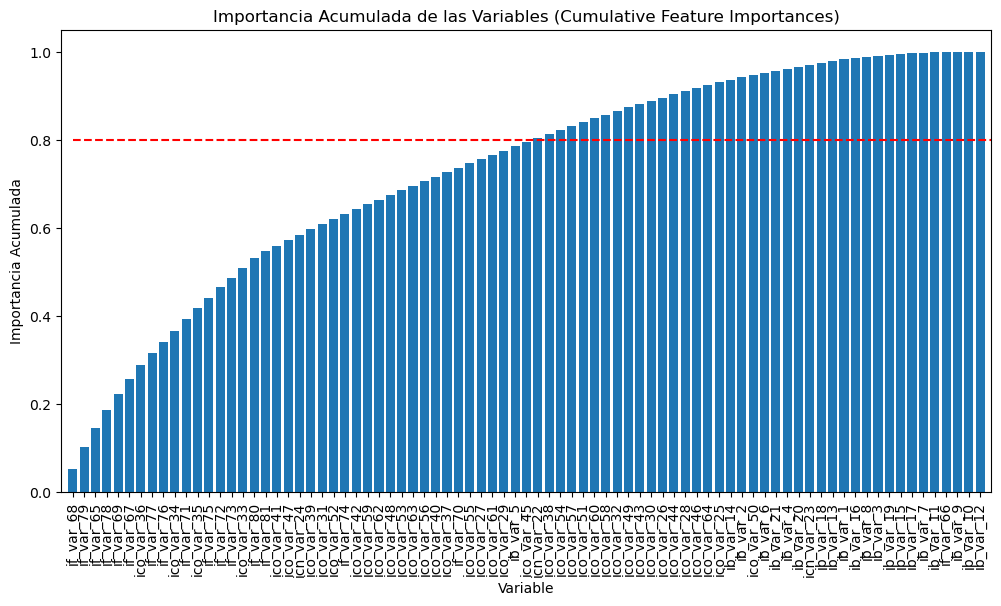

In [57]:
import matplotlib.pyplot as plt
import numpy as np

importances = rfc.feature_importances_

# Ordenar las importancias y sus índices
indices = np.argsort(importances)[::-1]

# Calcular la suma acumulada de las importancias
cumulative_importances = np.cumsum(importances[indices])

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.title("Importancia Acumulada de las Variables (Cumulative Feature Importances)")
plt.bar(range(X_train.shape[1]), cumulative_importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Variable')
plt.ylabel('Importancia Acumulada')

# Dibujar una línea en el 95% de la importancia total
plt.hlines(y=0.8, xmin=0, xmax=len(cumulative_importances), colors='r', linestyles='dashed')

plt.show()

In [58]:
# Calculando la suma acumulada de las importancias
cumulative_importances = np.cumsum(importances[indices])

# Encontrar el número de características para el 80% de la importancia total
n_features_80_percent = np.where(cumulative_importances >= 0.8)[0][0] + 1

# Las variables más importantes
important_feature_names = feature_names[indices[:n_features_80_percent]]

In [59]:
# Ajustar X_train y X_test
X_train_reduced = X_train[important_feature_names]
X_test_reduced = X_test[important_feature_names]

In [60]:
# Crear y entrenar el modelo con las variables seleccionadas
rfc_reduced = RandomForestClassifier(class_weight={0: 1, 1: 5}, n_estimators= 700, max_depth = 50, random_state=100)
rfc_reduced.fit(X_train_reduced, y_train)

# Hacer predicciones con el modelo reentrenado
pred_train = rfc_reduced.predict_proba(X_train_reduced)[:, 1]
pred_test = rfc_reduced.predict_proba(X_test_reduced)[:, 1]

#### Final result

In [172]:
print ("STEP 4: ASSESSING THE MODEL...")
# CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(y_train, pred_train)-1
print ("GINI DEVELOPMENT=", gini_score)

STEP 4: ASSESSING THE MODEL...
GINI DEVELOPMENT= 1.0


WHAT IS GINI?
* watch this video for reference: https://youtu.be/MiBUBVUC8kE


In [174]:
print ("STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!")
import requests
from requests.auth import HTTPBasicAuth
df_test['pred'] = pred_test
df_test['id'] = range(len(df_test))
df_test_tosend = df_test[['id','pred']]

filename = "df_test_tosend.csv"
df_test_tosend.to_csv(filename, sep=',')
url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
files = {'file': (filename, open(filename, 'rb')),
         'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}

#rsub = requests.post(url, files=files)
rsub = requests.post(url, files=files, auth=HTTPBasicAuth("lggago", "sha256$CY0UhSjv$fab0bad4f819d2dcb6bbf8ff0df8dcdf600eff512c7eb0d5ab4fc603ce5b4e26"))
resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.540006146082681


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import requests
from requests.auth import HTTPBasicAuth
import time 

for random_states in range(50, 150, 2):
    print(f"Entrenando modelo con random_state = {random_states}")
    rfc = RandomForestClassifier(class_weight={0: 1, 1: random_states}, n_estimators= 700 , max_depth = 40, random_state=77)
    fitted_model = rfc.fit(X_train, y_train)
    pred_train = fitted_model.predict_proba(X_train)[:,1]
    pred_test  = fitted_model.predict_proba(X_test)[:,1]
    # CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
    from sklearn.metrics import roc_auc_score
    gini_score = 2*roc_auc_score(y_train, pred_train)-1
    print ("GINI DEVELOPMENT=", gini_score)
    import requests
    from requests.auth import HTTPBasicAuth
    df_test['pred'] = pred_test
    df_test['id'] = range(len(df_test))
    df_test_tosend = df_test[['id','pred']]

    filename = "df_test_tosend.csv"
    df_test_tosend.to_csv(filename, sep=',')
    url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
    files = {'file': (filename, open(filename, 'rb')),
             'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}


    #rsub = requests.post(url, files=files)
    rsub = requests.post(url, files=files, auth=HTTPBasicAuth("lggago", "sha256$CY0UhSjv$fab0bad4f819d2dcb6bbf8ff0df8dcdf600eff512c7eb0d5ab4fc603ce5b4e26"))
    resp_str = str(rsub.text)
    print ("RESULT SUBMISSION: ", resp_str)
    time.sleep(5)

Entrenando modelo con random_state = 50
GINI DEVELOPMENT= 1.0
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.483513017680385
Entrenando modelo con random_state = 52
GINI DEVELOPMENT= 1.0
RESULT SUBMISSION:  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>

Entrenando modelo con random_state = 54
GINI DEVELOPMENT= 1.0
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.48017541751772175
Entrenando modelo con random_state = 56
GINI DEVELOPMENT= 1.0
RESULT SUBMISSION:  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or t

KeyboardInterrupt: 